<a href="https://colab.research.google.com/github/zerovoid22/ml-assignment/blob/main/credit_risk_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo

from sklearn.feature_selection import VarianceThreshold

import missingno as msno

import os
import io
import requests
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("/content/credit_risk_dataset.csv", skipinitialspace = True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [9]:
x = df.drop(labels = ["loan_status"], axis = 1)
y = df["loan_status"]

df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include=['object','category'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,32581.0,27.734600,6.348078,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.000,40.00,50.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,22880.00,28590.00,38500.00,55000.00,79200.00,86000.00,110004.000,138000.00,225200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.000,13.00,18.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,2000.00,3000.00,5000.00,8000.00,12200.00,14500.00,19000.000,24000.00,29800.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,6.03,6.91,7.90,10.99,13.47,13.92,15.298,16.32,18.62,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.000,1.00,1.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.320,0.38,0.50,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.000,14.00,17.00,30.00


**TARGET VARIABLE**

In [12]:
df["loan_status"].describe()

count    32581.000000
mean         0.218164
std          0.413006
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [13]:
df.loan_status.value_counts() / len(df) * 100

0    78.183604
1    21.816396
Name: loan_status, dtype: float64

In [14]:
ex.pie(df,names='loan_status',title='Propotion Of Loan Status',hole=0.33)

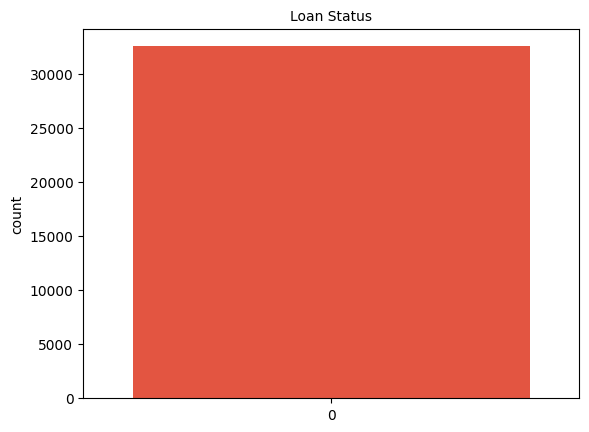

In [15]:
sns.countplot(df["loan_status"], palette='CMRmap')
plt.title("Loan Status",fontsize=10)
plt.show()

Text(0, 0.5, 'Loan Percent Income')

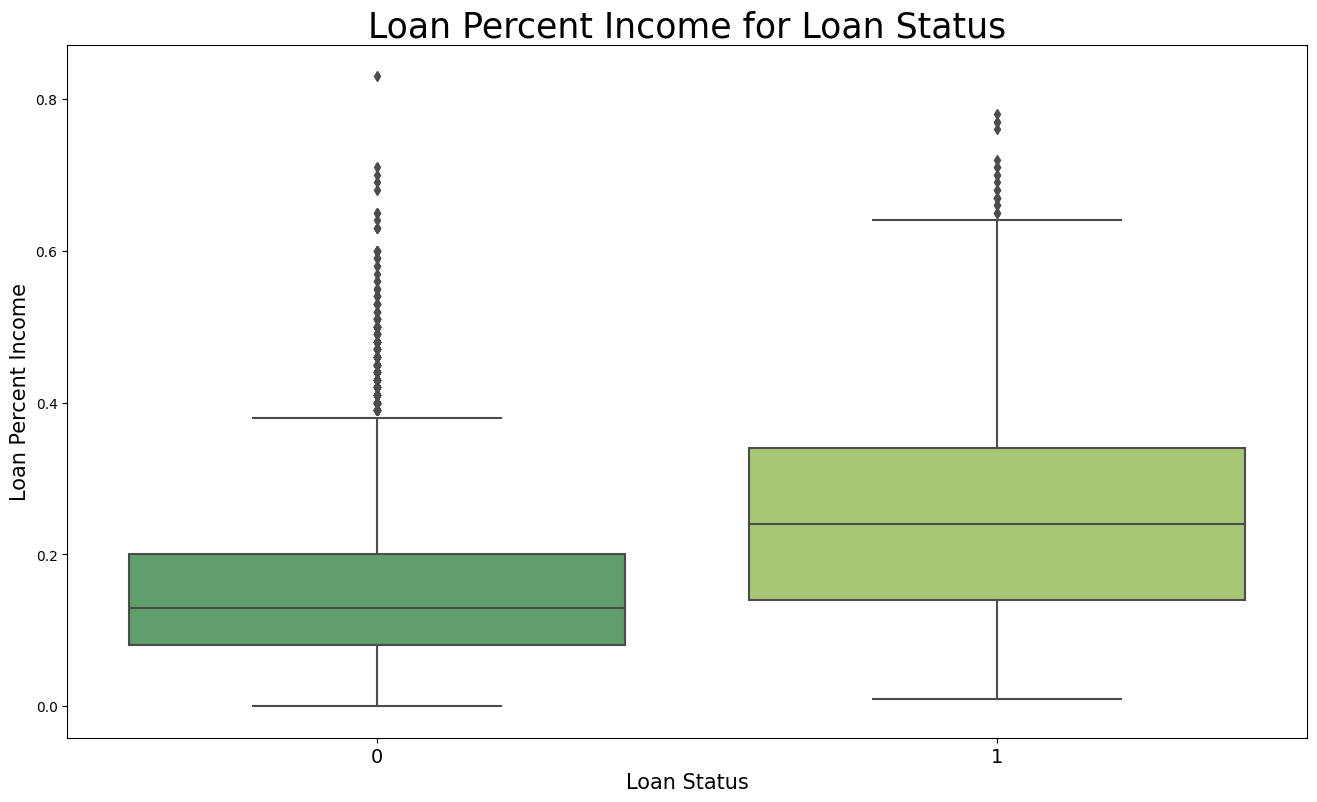

In [16]:
x = df[["loan_status", "loan_percent_income"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Loan Status", fontsize = 15)
plt.ylabel("Loan Percent Income", fontsize = 15)

In [17]:
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
dtype: float64

**CATEGORICAL VARIABLES**

In [18]:
df.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [19]:
df.select_dtypes(include=['object','category']).columns.tolist()

df_cat = df.select_dtypes(include=['object','category'])
df_cat.count()

person_home_ownership        32581
loan_intent                  32581
loan_grade                   32581
cb_person_default_on_file    32581
dtype: int64

In [20]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.33)

In [21]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.33)

In [22]:
ex.pie(df,names='loan_grade',title='Propotion Of Loan Grade',hole=0.33)

In [23]:
ex.pie(df,names='cb_person_default_on_file',title='Propotion Of CB Person Default On File',hole=0.33)

In [24]:
cat_col = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]
df[cat_col].mode()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,A,N


TypeError: ignored

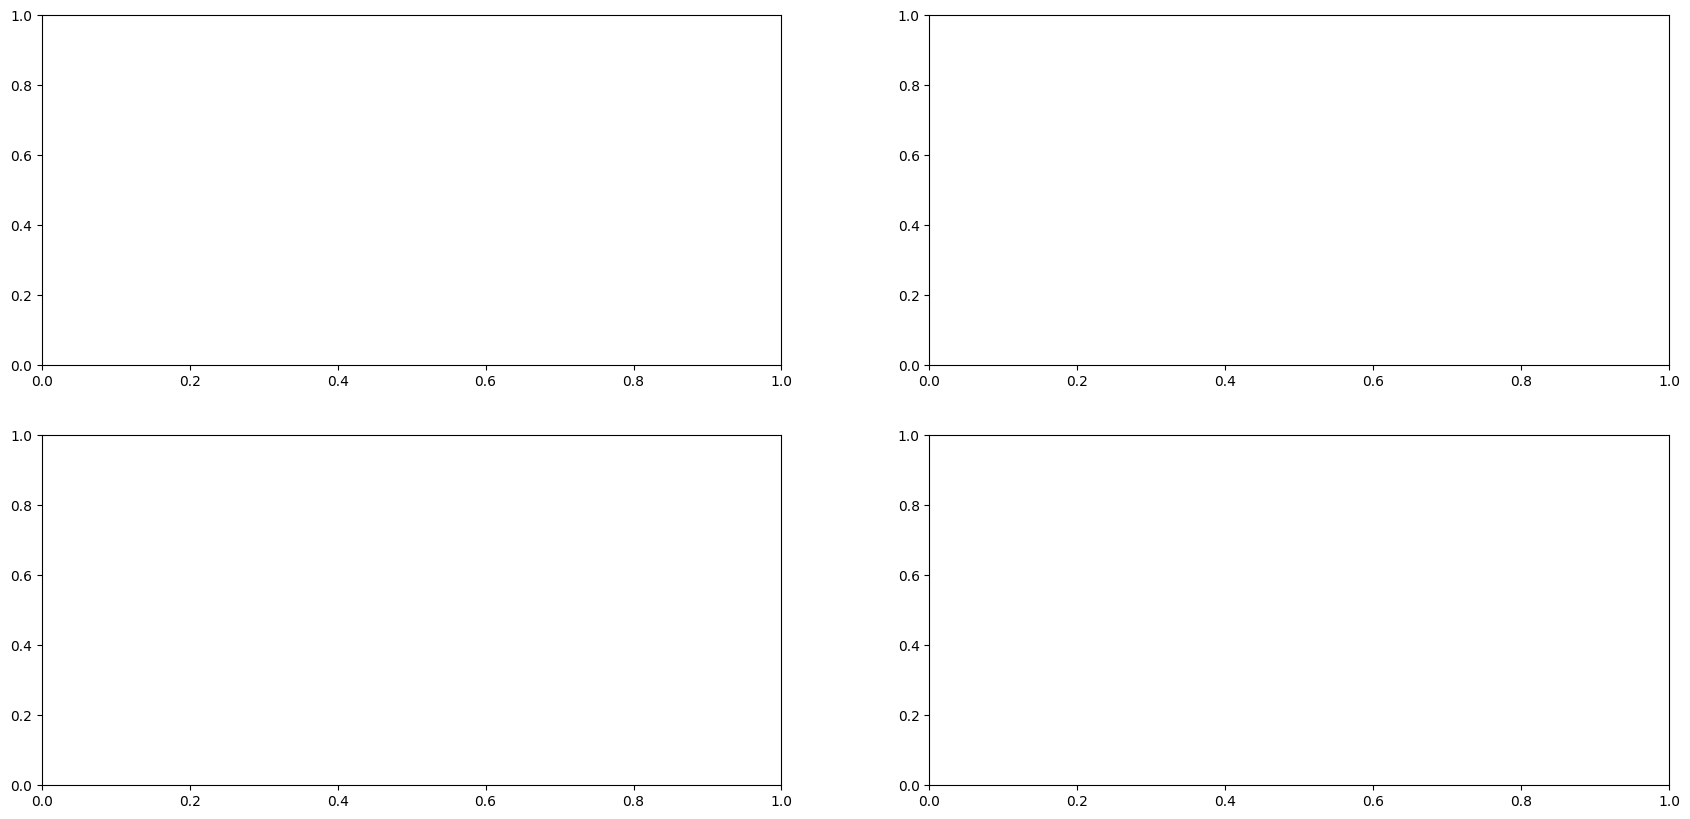

In [25]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',data=df,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',data=df,ax=axes[1,0],palette='CMRmap')

TypeError: ignored

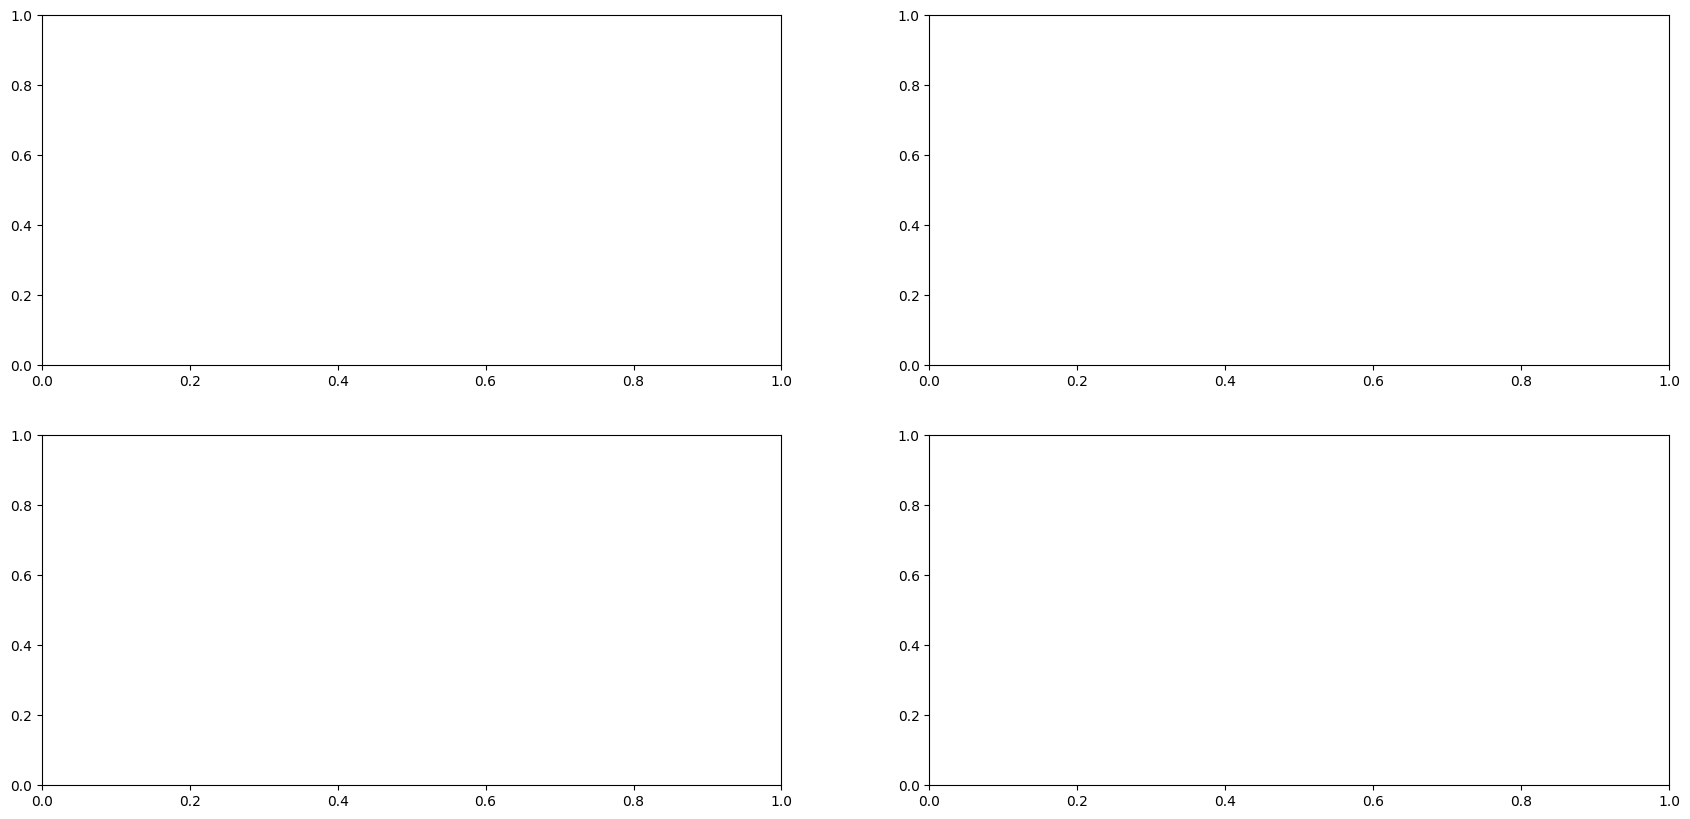

In [26]:
fig,axes = plt.subplots(2,2, figsize=(21,10))

sns.countplot('person_home_ownership',hue="loan_status",data=df,ax=axes[0,0],palette='CMRmap')
sns.countplot('loan_intent',data=df,hue="loan_status",ax=axes[0,1],palette='CMRmap')
sns.countplot('loan_grade',data=df,hue="loan_status",ax=axes[1,1],palette='CMRmap')
sns.countplot('cb_person_default_on_file',hue="loan_status",data=df,ax=axes[1,0],palette='CMRmap')

**STATISTICS**

In [27]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.73,6.35,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.85,61983.12,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.79,4.14,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.37,6322.09,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.01,3.24,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.17,0.11,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.80,4.06,2.00,3.00,4.00,8.00,30.00


In [28]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [29]:
percent_missing = (df.isnull().sum().sort_values(ascending = False) * 100 / len(df)).round(2)
percent_missing

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

<Axes: >

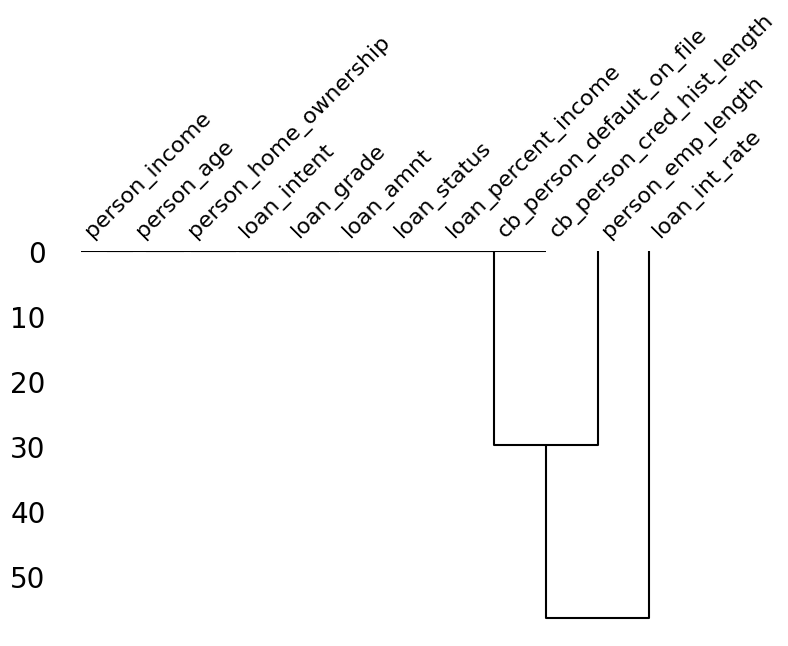

In [30]:
msno.dendrogram(df, figsize = (8, 5))

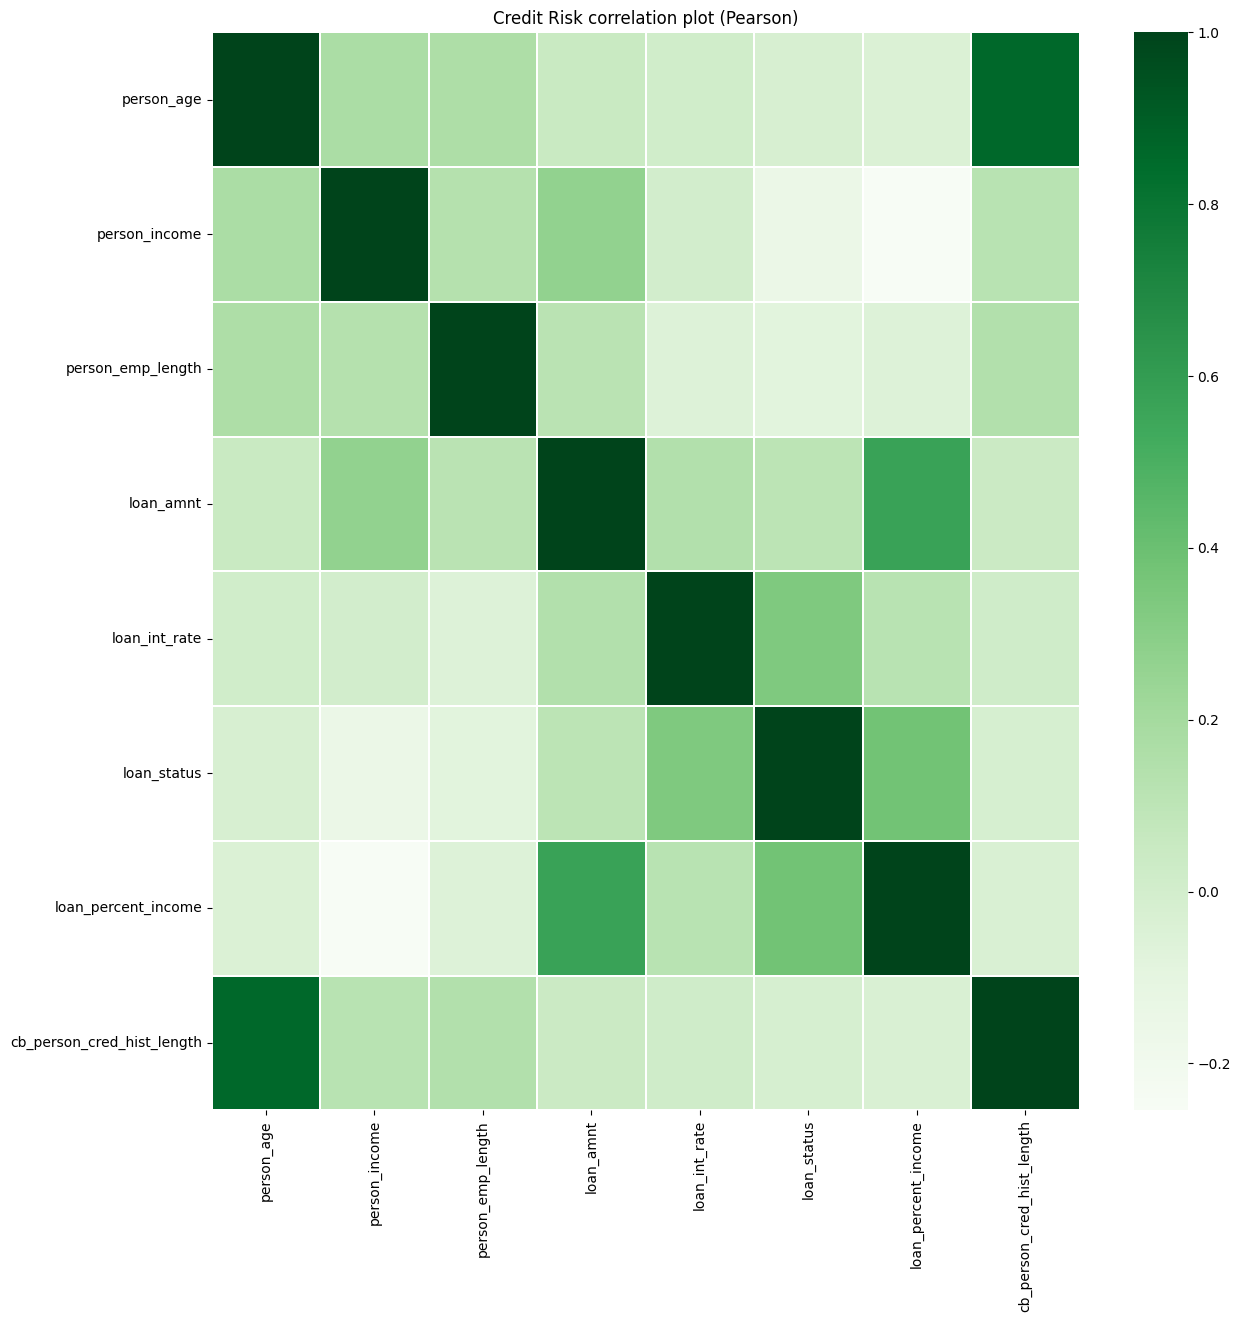

In [31]:
plt.figure(figsize = (14,14))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

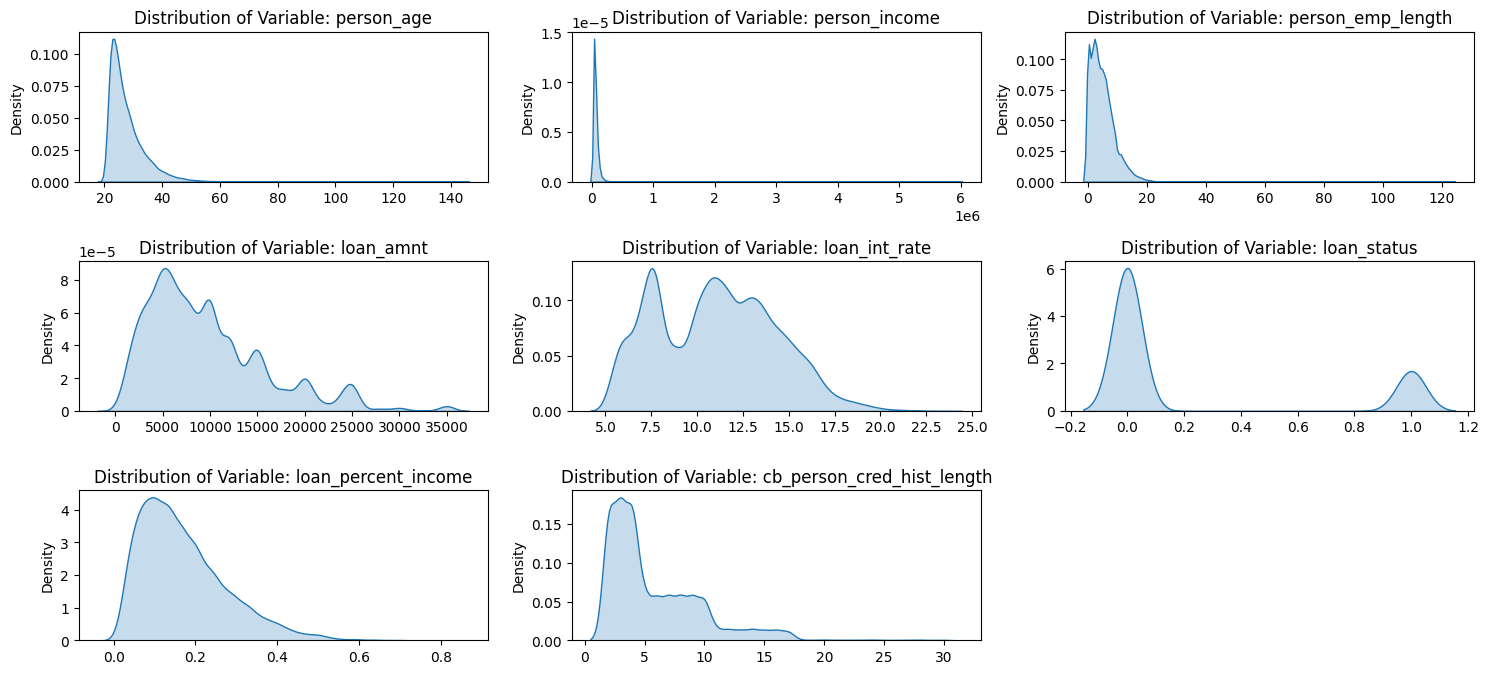

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()  
cols = df_num.columns[:]

for col, ax in zip(cols, axes):
    data = df_num 
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)
    
fig.delaxes(axes[8])
fig.tight_layout()
plt.show()

In [33]:
df_num.skew()

person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [34]:
df_num.kurtosis()

person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64

In [35]:
constant_selector= VarianceThreshold(threshold = 0)
constant_selector.fit(df_num)

VarianceThreshold(threshold=0)

In [36]:
constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [37]:
sum(constant_selector.get_support())

8

In [38]:
constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[constant_selector.get_support()]]

print(len(constant_columns))

0


In [39]:
quasi_constant_selector = VarianceThreshold(threshold = 0.01) 

quasi_constant_selector.fit(df_num)

VarianceThreshold(threshold=0.01)

In [40]:
quasi_constant_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [41]:
quasi_constant_columns = [column for column in df_num.columns
                    if column not in df_num.columns[quasi_constant_selector.get_support()]]

print(len(quasi_constant_columns))

0


In [42]:
percentile_25 = df_num["person_age"].quantile(0.25)
percentile_75 = df_num["person_age"].quantile(0.75)

percentile_25
percentile_75      

iqr = percentile_75 - percentile_25
iqr

upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

upper_limit   
lower_limit

12.5

In [43]:
df_num[df_num["person_age"] > upper_limit]   
df_num[df_num["person_age"] < lower_limit]

IQR_outliers = df_num[(df_num.person_age <= lower_limit) | (df_num.person_age >= upper_limit)]
IQR_outliers

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
81,144,250000,4.0,4800,13.57,0,0.02,3
183,144,200000,4.0,6000,11.86,0,0.03,2
575,123,80004,2.0,20400,10.25,0,0.25,3
747,123,78000,7.0,20000,NaN,0,0.26,4
29121,50,900000,11.0,30000,12.69,0,0.03,15
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [44]:
upper_bound = df_num["person_age"].quantile(0.99)  
lower_bound = df_num["person_age"].quantile(0.01)  

upper_bound
lower_bound

21.0

<Axes: >

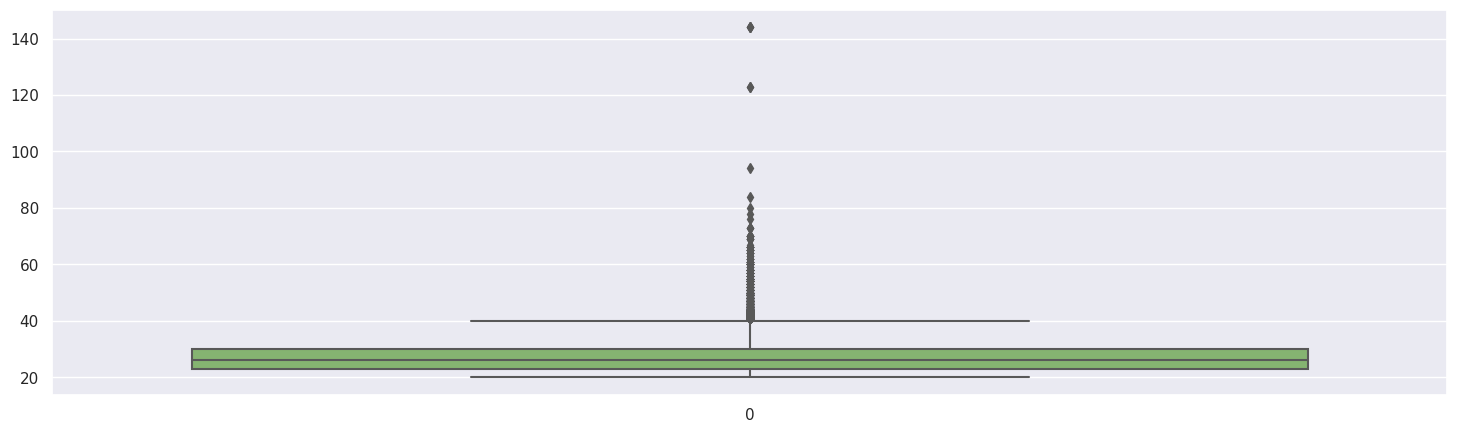

In [45]:
sns.set(rc = {"figure.figsize" : (18,5)})

sns.boxplot(df_num["person_age"], palette="summer")

<Axes: >

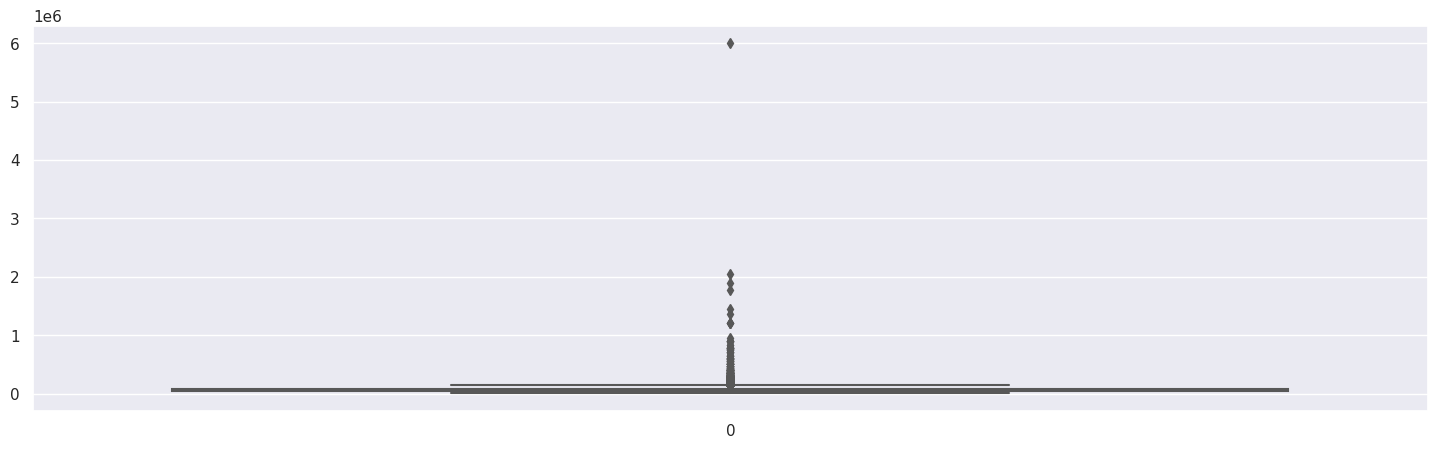

In [46]:
sns.boxplot(df_num["person_income"], palette="summer")

<Axes: >

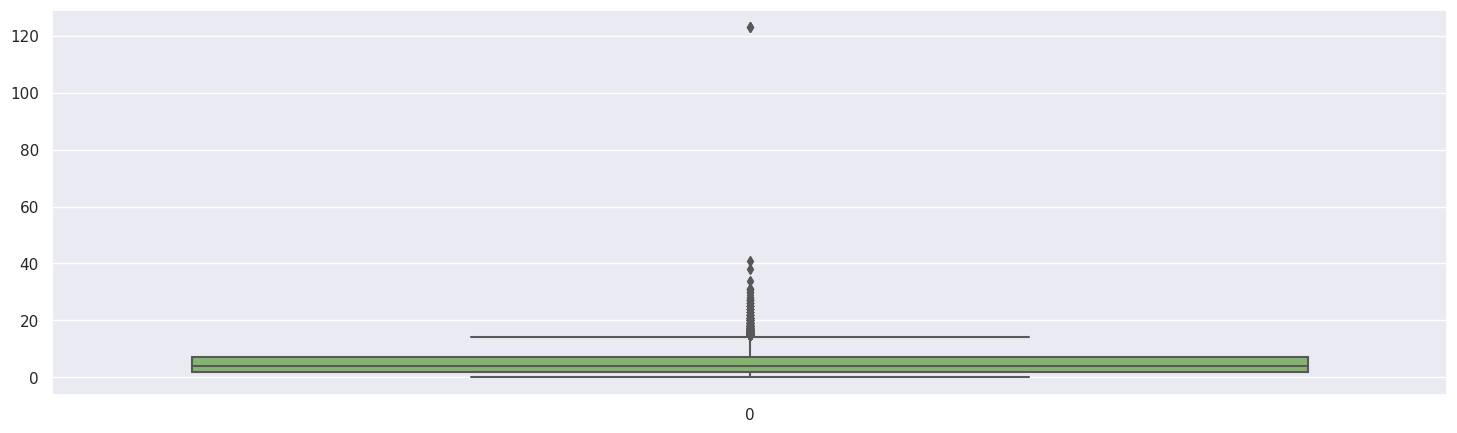

In [47]:
sns.boxplot(df_num["person_emp_length"], palette="summer")

<Axes: >

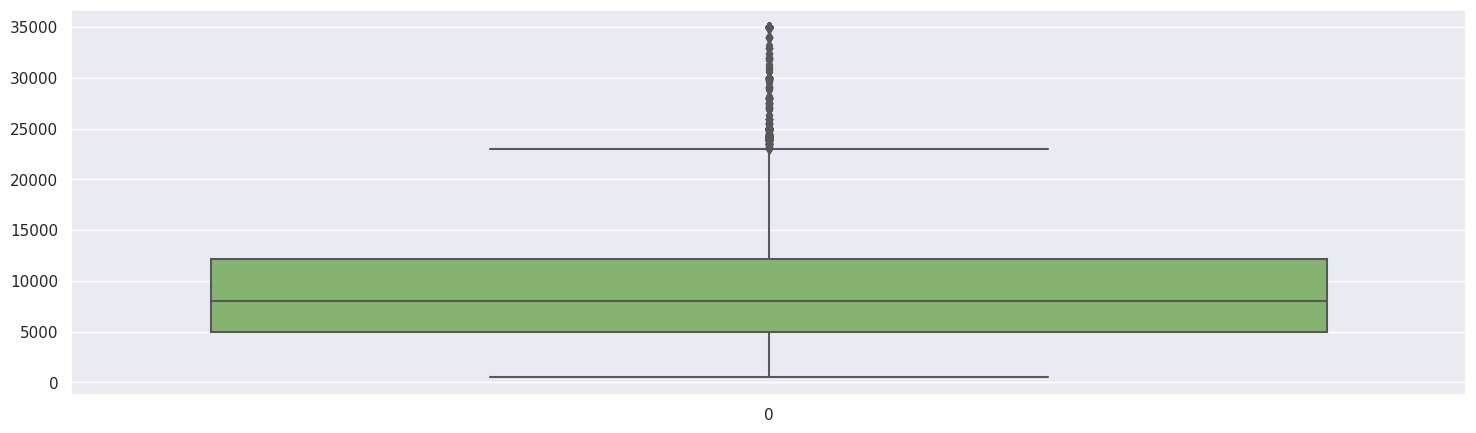

In [48]:
sns.boxplot(df_num["loan_amnt"], palette="summer")

<Axes: >

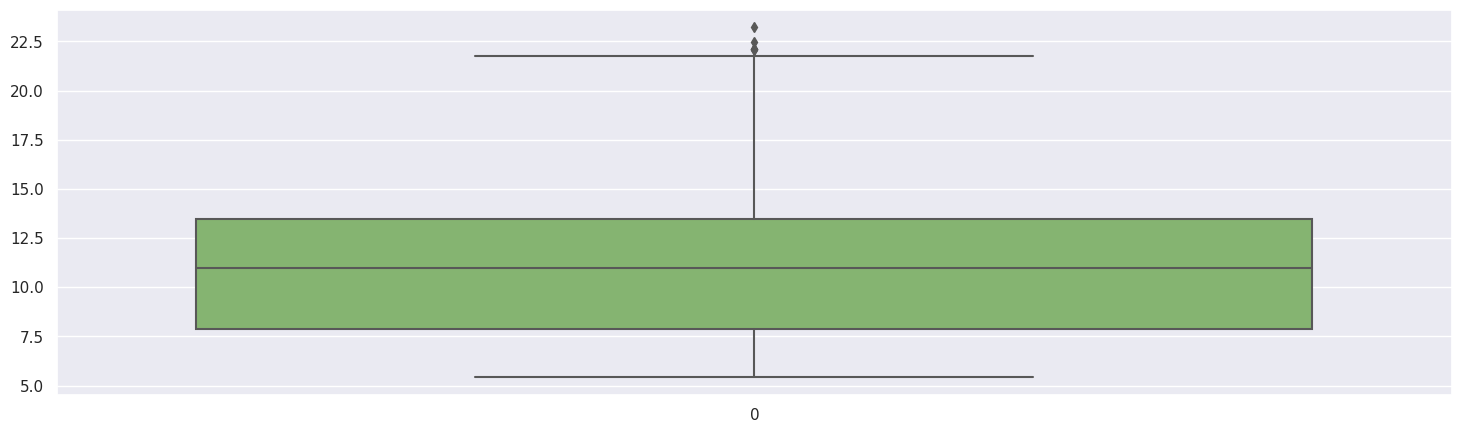

In [49]:
sns.boxplot(df_num["loan_int_rate"], palette="summer")

<Axes: >

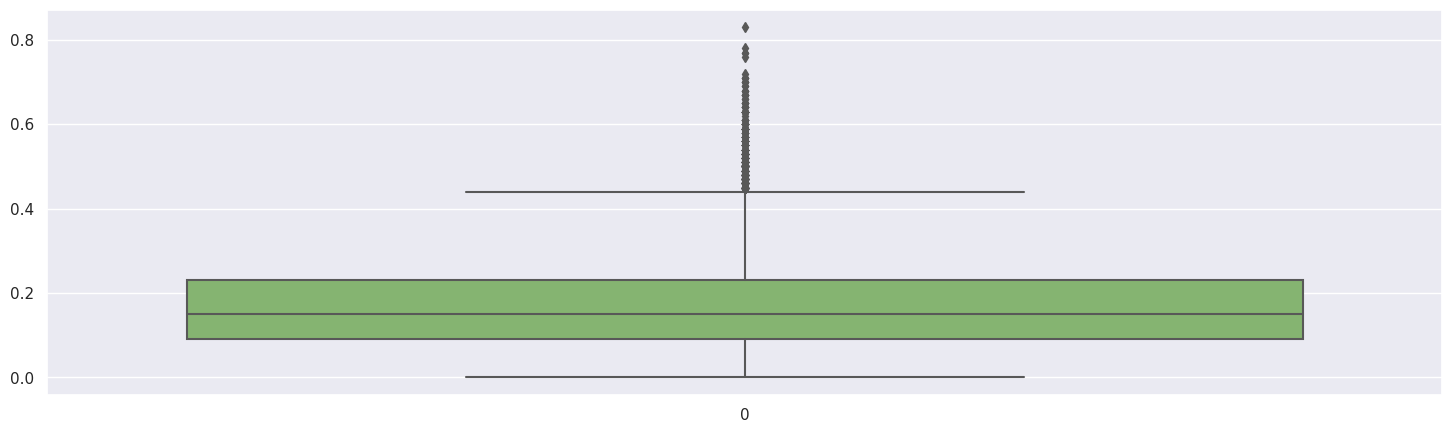

In [50]:
sns.boxplot(df_num["loan_percent_income"], palette="summer")

<Axes: >

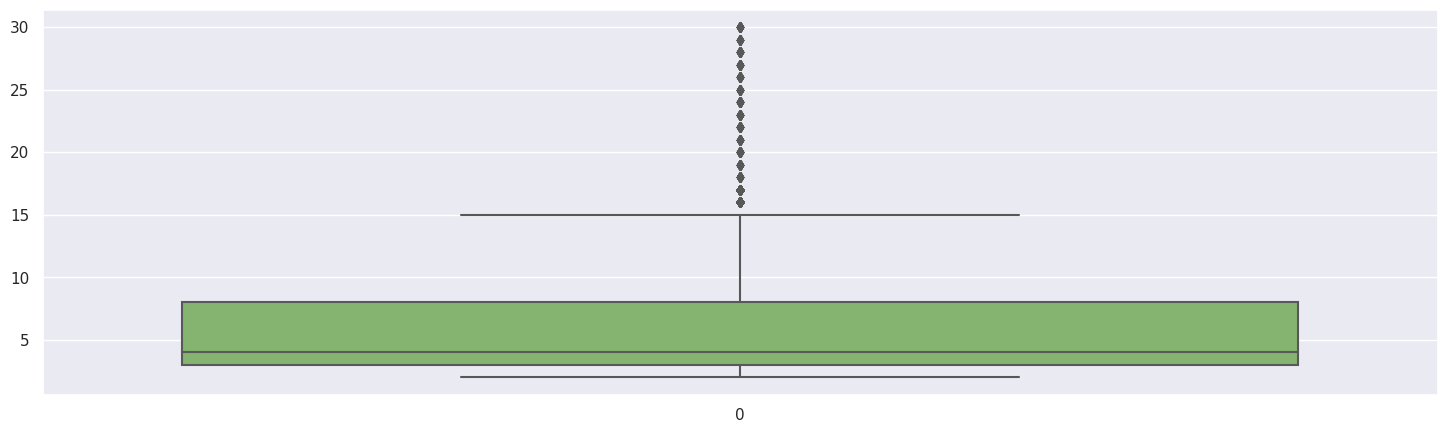

In [51]:
sns.boxplot(df_num["cb_person_cred_hist_length"],palette="summer")

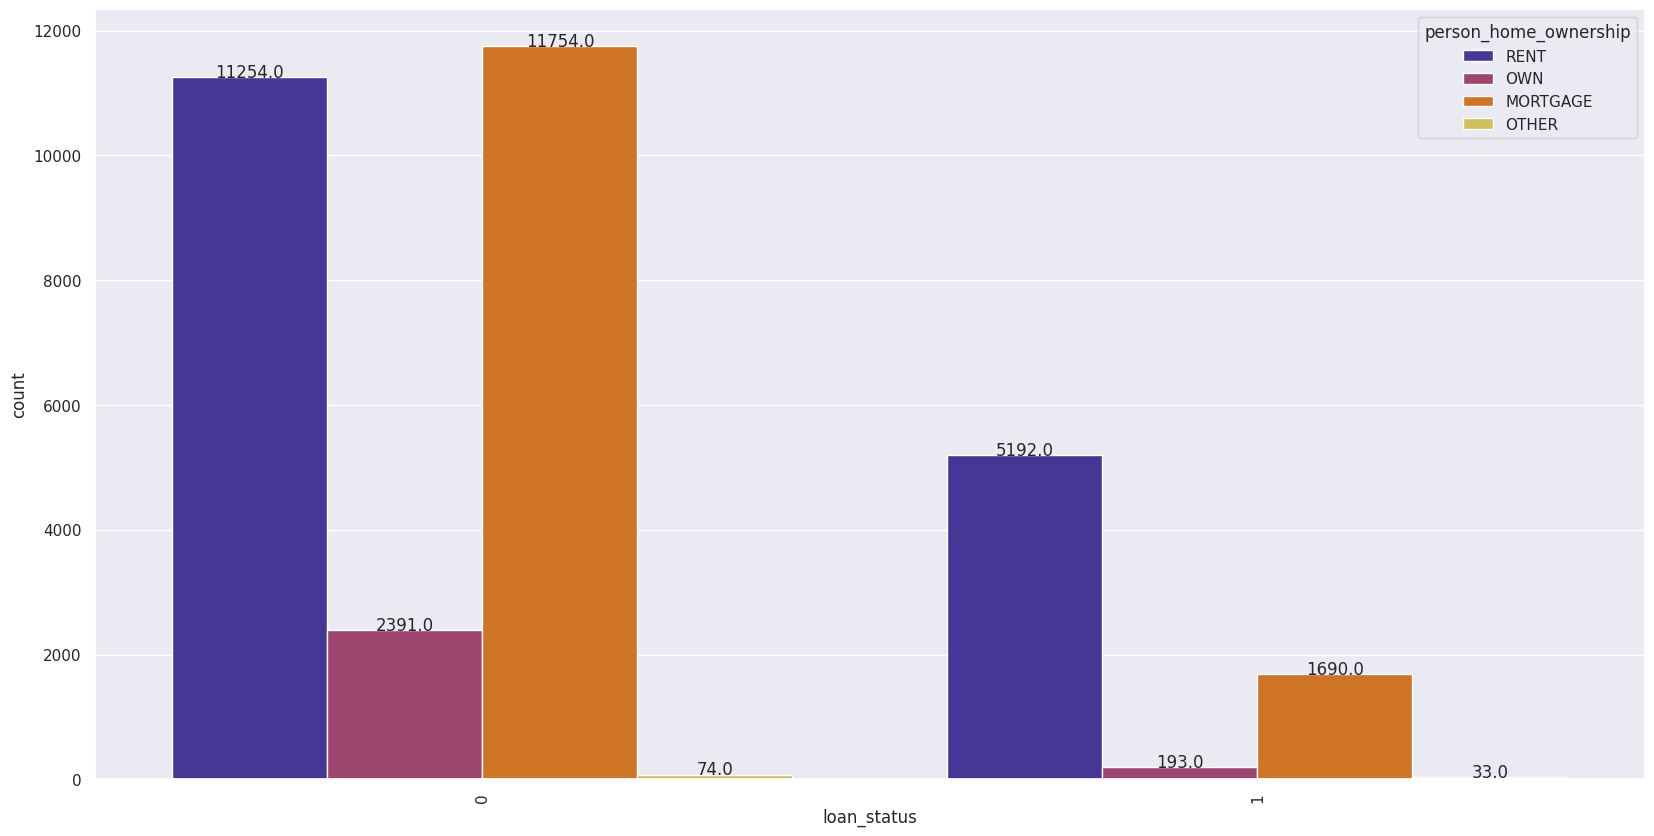

In [53]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="person_home_ownership",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

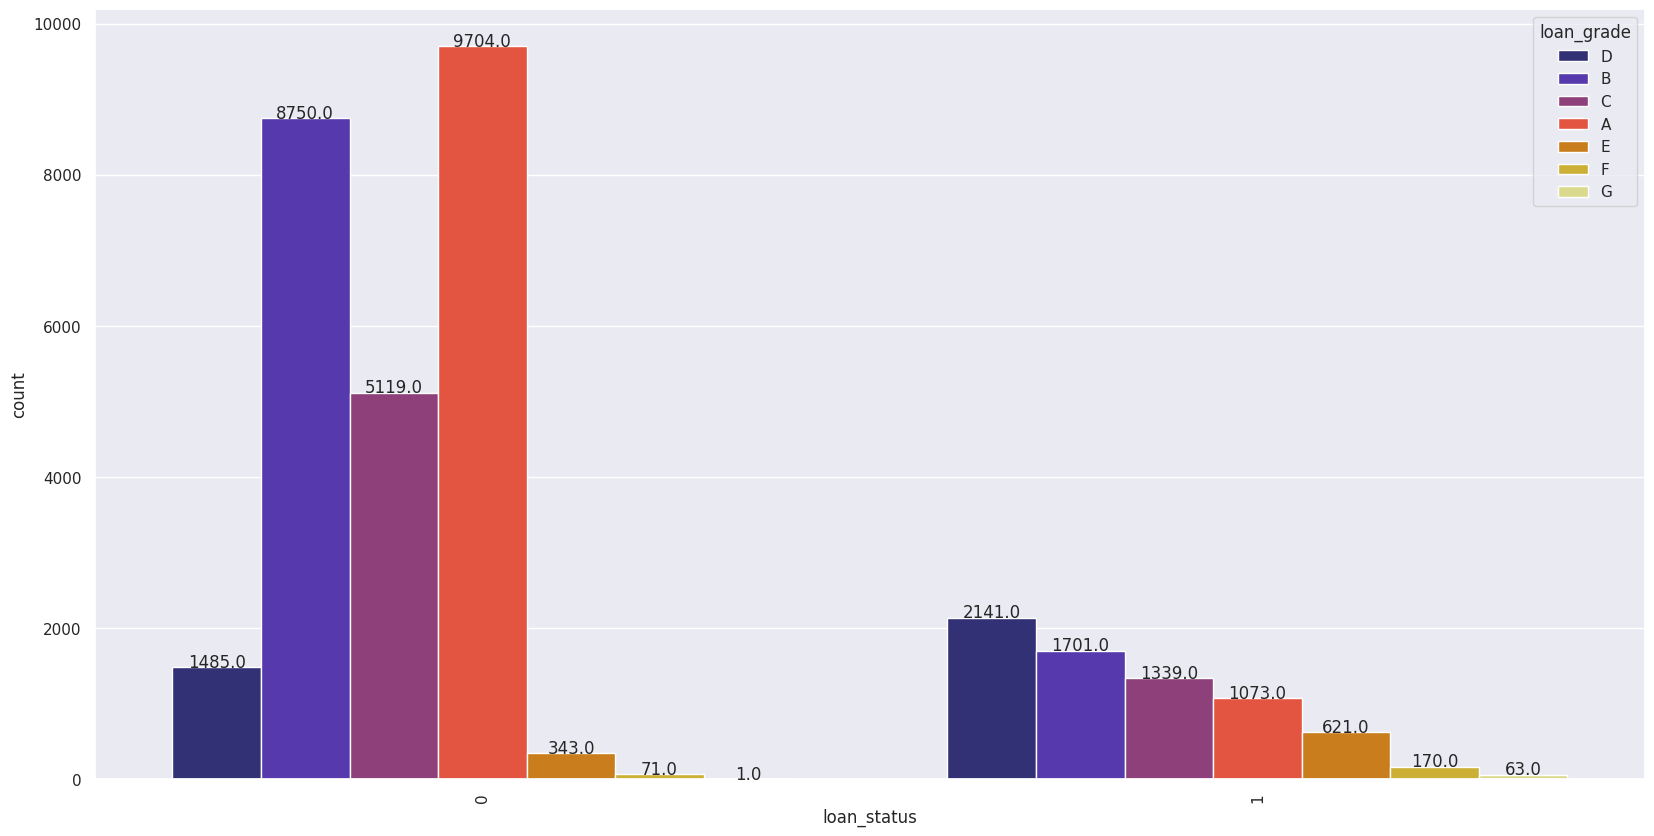

In [54]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_grade",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

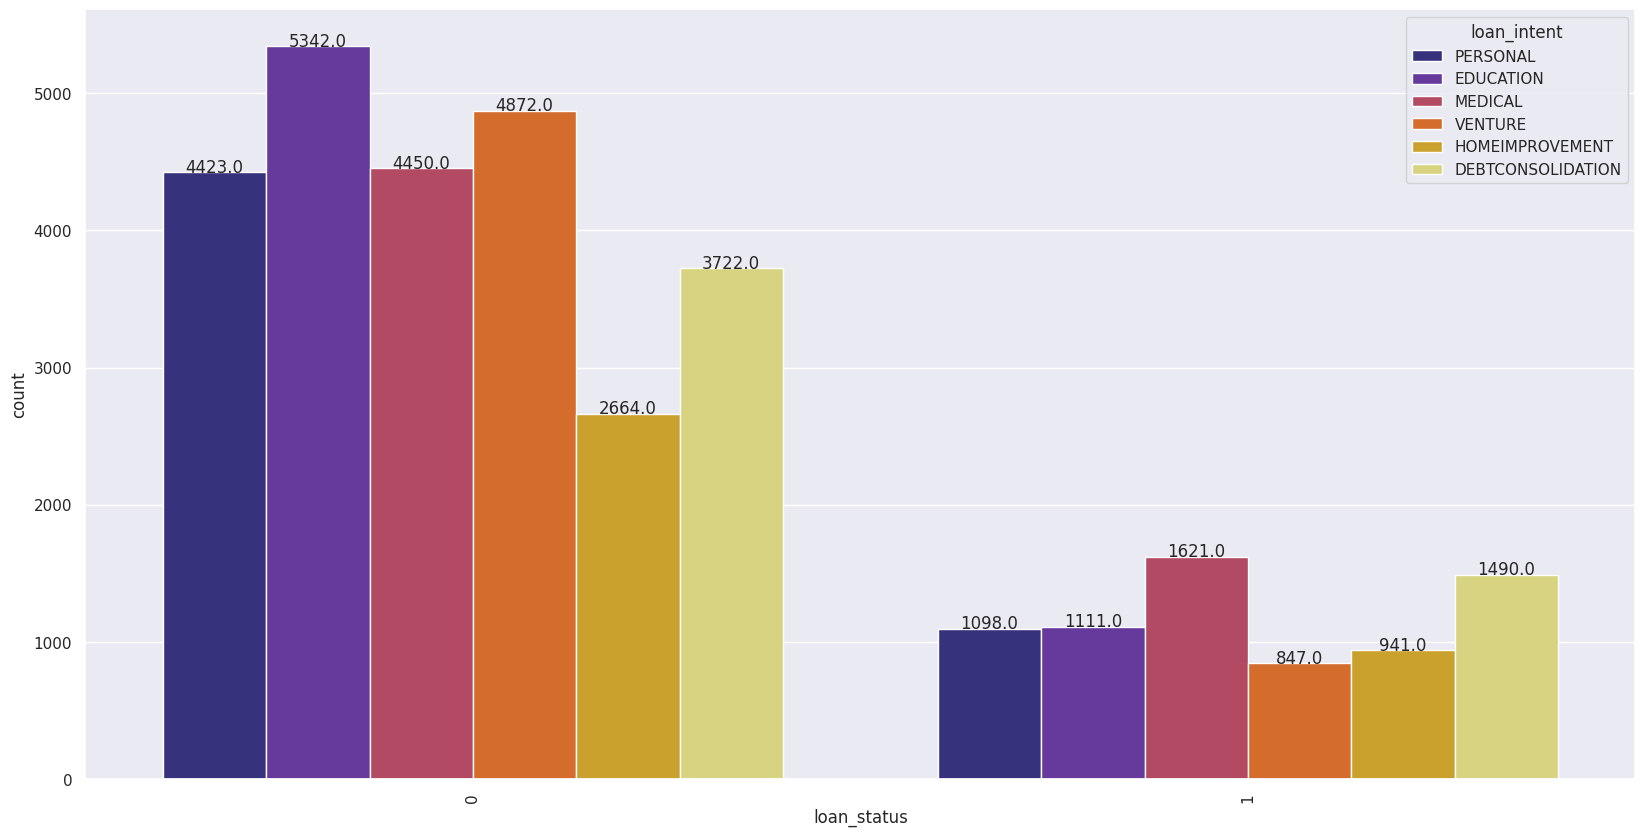

In [56]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='loan_status',hue="loan_intent",data=df, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")